# Imports

In [1]:
import pandas as pd

# Visualisations
import seaborn as sns
from plotnine import *

# Getting the data

## Spanish language movies

In [50]:
page = requests.get('https://www.imdb.com/search/title/?title_type=feature&primary_language=es')
tree = html.fromstring(page.content)

## Movies produced in Spain

In [ ]:
df_spanish_movies_bechdel = pd.read_csv("def_wikipedia_spanish_movies_bechdel.csv", dtype='str')

In [349]:
df_spanish_movies_bechdel

,index,status,version,description,date,dubious,year,visible,rating,title,submitterid,id,imdbid
0,22,NaN,NaN,NaN,2010-09-20 14:03:37,0,1984.0,1,3.0,What Have I Done to Deserve This?,1917.0,1582.0,0088461
1,42,NaN,NaN,NaN,2016-08-29 21:07:49,0,2007.0,1,3.0,Las 13 rosas,13899.0,7079.0,0809533
2,49,NaN,NaN,NaN,2013-09-30 07:26:05,0,2005.0,1,3.0,20 centimetros,8387.0,4648.0,0421528
3,57,NaN,NaN,NaN,2011-04-17 13:15:29,0,2010.0,1,3.0,For 80 Days,3070.0,2192.0,1600383
4,84,NaN,NaN,NaN,2017-05-21 15:24:52,0,2002.0,1,3.0,A mi madre le gustan las mujeres,14890.0,7649.0,0306432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,53,NaN,NaN,NaN,2018-01-06 23:15:46,0,2017.0,1,3.0,Veronica,15613.0,7985.0,5862312
119,80,NaN,NaN,NaN,2014-03-15 16:44:43,0,2013.0,1,0.0,Vivir es facil con los ojos cerrados,9671.0,5283.0,2896036
120,95,NaN,NaN,NaN,2014-08-24 19:48:57,0,2013.0,1,3.0,The German Doctor,10733.0,5714.0,1847746
121,109,NaN,NaN,NaN,2010-09-08 11:41:30,0,2007.0,1,3.0,XXY,1859.0,1552.0,0995829


In [350]:
df_spanish_movies_bechdel['year'] = df_spanish_movies_bechdel['year'].astype(float)
df_spanish_movies_bechdel['rating'] = df_spanish_movies_bechdel['rating'].astype(float)

In [351]:
df_spanish_movies_bechdel.rename(columns={'rating':'Bechdel Score'}, inplace=True)

In [352]:
df_spanish_movies_bechdel['year'] = pd.to_datetime(df_spanish_movies_bechdel['year'], format='%Y')

In [353]:
df_spanish_movies_bechdel['Bechdel Score'] = df_spanish_movies_bechdel['Bechdel Score'].astype('category', copy=False)

<AxesSubplot:xlabel='Bechdel Score', ylabel='count'>

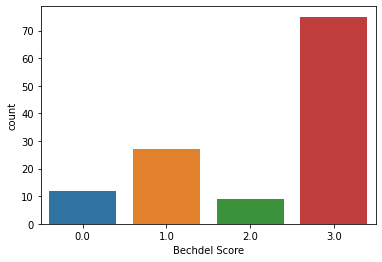

In [354]:
sns.countplot(x='Bechdel Score', data=df_spanish_movies_bechdel)

In [355]:
li = []
for i in df_spanish_movies_bechdel['Bechdel Score']:
    if(i < 3):
        li.append(0)
    else:
        li.append(1)
df_spanish_movies_bechdel['pass_test'] = li
df_spanish_movies_bechdel

,index,status,version,description,date,dubious,year,visible,Bechdel Score,title,submitterid,id,imdbid,pass_test
0,22,NaN,NaN,NaN,2010-09-20 14:03:37,0,1984-01-01,1,3.0,What Have I Done to Deserve This?,1917.0,1582.0,0088461,1
1,42,NaN,NaN,NaN,2016-08-29 21:07:49,0,2007-01-01,1,3.0,Las 13 rosas,13899.0,7079.0,0809533,1
2,49,NaN,NaN,NaN,2013-09-30 07:26:05,0,2005-01-01,1,3.0,20 centimetros,8387.0,4648.0,0421528,1
3,57,NaN,NaN,NaN,2011-04-17 13:15:29,0,2010-01-01,1,3.0,For 80 Days,3070.0,2192.0,1600383,1
4,84,NaN,NaN,NaN,2017-05-21 15:24:52,0,2002-01-01,1,3.0,A mi madre le gustan las mujeres,14890.0,7649.0,0306432,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,53,NaN,NaN,NaN,2018-01-06 23:15:46,0,2017-01-01,1,3.0,Veronica,15613.0,7985.0,5862312,1
119,80,NaN,NaN,NaN,2014-03-15 16:44:43,0,2013-01-01,1,0.0,Vivir es facil con los ojos cerrados,9671.0,5283.0,2896036,0
120,95,NaN,NaN,NaN,2014-08-24 19:48:57,0,2013-01-01,1,3.0,The German Doctor,10733.0,5714.0,1847746,1
121,109,NaN,NaN,NaN,2010-09-08 11:41:30,0,2007-01-01,1,3.0,XXY,1859.0,1552.0,0995829,1


<AxesSubplot:xlabel='pass_test', ylabel='count'>

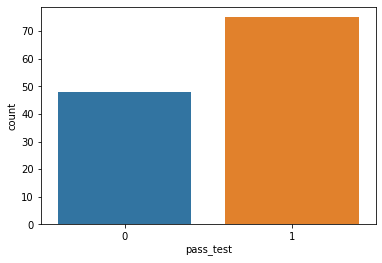

In [356]:
sns.countplot(x='pass_test', data=df_spanish_movies_bechdel)

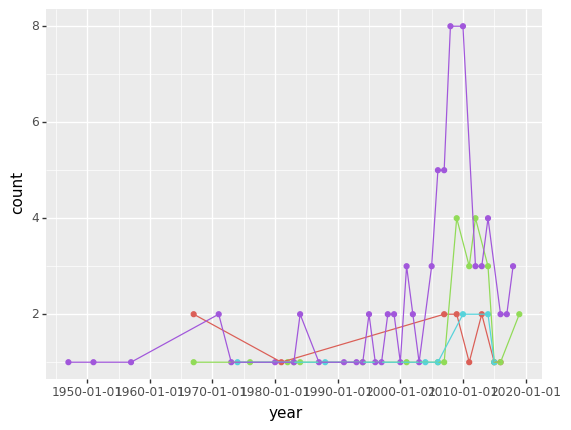

<ggplot: (8772481264887)>

In [357]:
(ggplot(df_spanish_movies_bechdel)+
 geom_point(aes('year',color=df_spanish_movies_bechdel['Bechdel Score']),stat='count',show_legend=False)+
 geom_line(aes('year',color=df_spanish_movies_bechdel['Bechdel Score']),stat='count',show_legend=False))

## Analysis of Spanish movies ratings and Bechdel scores

In [376]:
imdb_df = pd.read_csv('spanish_movies_ratings.csv', dtype=str)
df_spanish_movies_bechdel_ratings = pd.merge(df_spanish_movies_bechdel, imdb_df, how='left', left_on=['imdbid'], right_on=['imdbid'])
df_spanish_movies_bechdel_ratings

,index,status,version,description,date,dubious,year,visible,Bechdel Score,title,submitterid,id,imdbid,pass_test,rating
0,22,NaN,NaN,NaN,2010-09-20 14:03:37,0,1984-01-01,1,3.0,What Have I Done to Deserve This?,1917.0,1582.0,0088461,1,7.1
1,42,NaN,NaN,NaN,2016-08-29 21:07:49,0,2007-01-01,1,3.0,Las 13 rosas,13899.0,7079.0,0809533,1,6.6
2,49,NaN,NaN,NaN,2013-09-30 07:26:05,0,2005-01-01,1,3.0,20 centimetros,8387.0,4648.0,0421528,1,6.6
3,57,NaN,NaN,NaN,2011-04-17 13:15:29,0,2010-01-01,1,3.0,For 80 Days,3070.0,2192.0,1600383,1,6.9
4,84,NaN,NaN,NaN,2017-05-21 15:24:52,0,2002-01-01,1,3.0,A mi madre le gustan las mujeres,14890.0,7649.0,0306432,1,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,53,NaN,NaN,NaN,2018-01-06 23:15:46,0,2017-01-01,1,3.0,Veronica,15613.0,7985.0,5862312,1,6.2
119,80,NaN,NaN,NaN,2014-03-15 16:44:43,0,2013-01-01,1,0.0,Vivir es facil con los ojos cerrados,9671.0,5283.0,2896036,0,7.0
120,95,NaN,NaN,NaN,2014-08-24 19:48:57,0,2013-01-01,1,3.0,The German Doctor,10733.0,5714.0,1847746,1,6.7
121,109,NaN,NaN,NaN,2010-09-08 11:41:30,0,2007-01-01,1,3.0,XXY,1859.0,1552.0,0995829,1,7.0


In [377]:
df_spanish_movies_bechdel_ratings['rating'] = df_spanish_movies_bechdel_ratings['rating'].astype(float)

# Creating a new dataframe with only year, Bechdel scores, and imdb rating:
df_spanish_movies_year_score_rating = df_spanish_movies_bechdel_ratings.groupby(['year','Bechdel Score']).agg({'rating':'mean'}).reset_index()
df_spanish_movies_year_score_rating

,year,Bechdel Score,rating
0,1947-01-01,0.0,NaN
1,1947-01-01,1.0,NaN
2,1947-01-01,2.0,NaN
3,1947-01-01,3.0,6.300000
4,1951-01-01,0.0,NaN
...,...,...,...
167,2018-01-01,3.0,6.733333
168,2019-01-01,0.0,NaN
169,2019-01-01,1.0,7.550000
170,2019-01-01,2.0,NaN


/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:412: PlotnineWarning: geom_point : Removed 109 rows containing missing values.


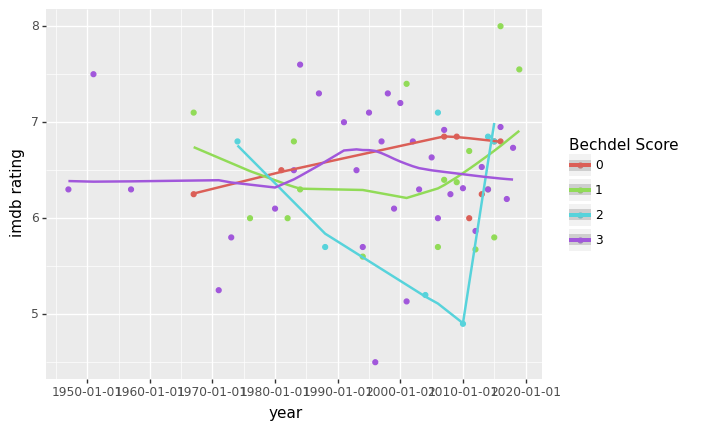

<ggplot: (8772438042435)>

In [381]:
# Plot year against IMDB rating and Bechdel Score:
ratings_plot = ggplot(df_spanish_movies_year_score_rating,aes(x='year',y='rating',color='Bechdel Score'))+geom_point()+geom_smooth()+scale_y_continuous(name="imdb rating")+labs( colour='Bechdel Score' )
ratings_plot

In [382]:
ggsave(plot = ratings_plot, filename = 'Ratings plot')

/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: Ratings plot
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/Administrad